In [3]:
import os
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import pandas as pd
import tensorflow as tf
%matplotlib inline
%load_ext jupyternotify

2024-09-19 17:15:43.491802: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<IPython.core.display.Javascript object>

In [4]:
os.getcwd()

'/Users/adam/Portfolio/Pokedex'

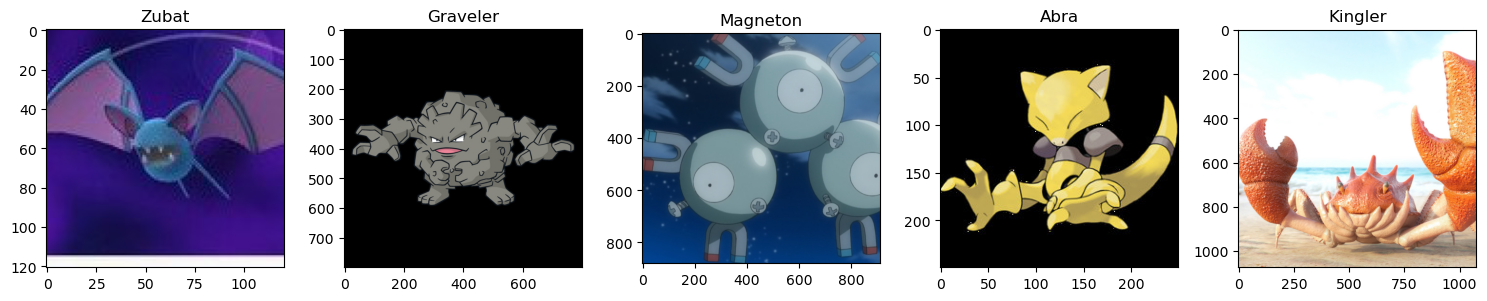

In [5]:
# Setting the path for images
# image_path = '/Users/adam/Portfolio/Pokedex/dataset'
image_path = '/Users/adam/Portfolio/Pokedex/PokemonData'

# Getting a list of all image filenames
image_folders = os.listdir(image_path)
image_folders.remove(".DS_Store")

# Loading and displaying the first 5 Pokémon images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

for i, img_folder in enumerate(image_folders[9:14]):

    img_num = len(os.listdir(os.path.join(image_path, img_folder)))
    rand_image = os.listdir(os.path.join(image_path, img_folder))[random.randint(0, img_num - 1)]
    img = Image.open(os.path.join(image_path, img_folder, rand_image))
    axes[i].imshow(img)
    axes[i].set_title(img_folder.split('.')[0])  # Setting title as the Pokémon name
#     print(os.path.join(image_path, img_folder, rand_image))
#     axes[i].axis('off')

plt.tight_layout()

In [6]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

image_count = {}
image_height = []
image_width = []
for i, img_folder in enumerate(image_folders):
    list_dir = os.listdir(os.path.join(image_path, img_folder))
    image_count[img_folder] = len(list_dir)
    for img in list_dir:
        try:          
            img = Image.open(os.path.join(image_path, img_folder, img))
            image_height.append(img.height)
            image_width.append(img.width)
        except:
            pass
        
image_count = pd.Series(image_count)
image_count.describe()

count    149.000000
mean      45.684564
std        6.817195
min       26.000000
25%       41.000000
50%       46.000000
75%       50.000000
max       66.000000
dtype: float64

In [7]:
image_count.sum()

6807

In [8]:
%%notify

image_dict = {}

for pokemon in image_folders:
    image_list = os.listdir(os.path.join(image_path, pokemon))
    image_dict[pokemon] = []
    for img in image_list:
        try:
            with Image.open(os.path.join(image_path, pokemon, img)) as img:
                image_dict[pokemon].append(np.array(img))
        except:
            pass

<IPython.core.display.Javascript object>

In [9]:
image_dimensions = pd.DataFrame(data=pd.Series(image_height), columns=["height"])
image_dimensions["width"] = pd.Series(image_width)

<Axes: xlabel='width', ylabel='height'>

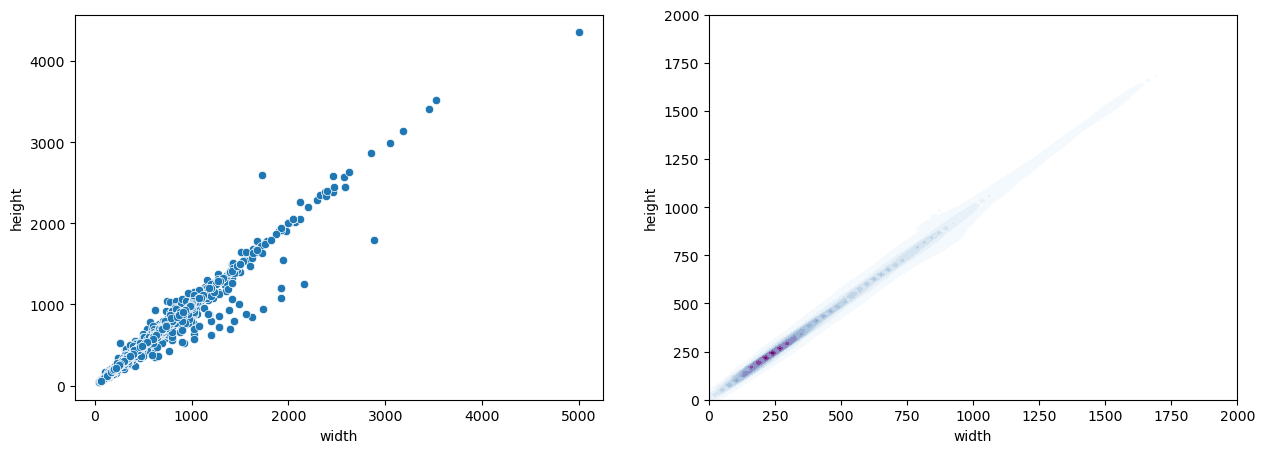

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes[1].set_xlim([0,2000])
axes[1].set_ylim([0,2000])

sns.scatterplot(x=image_dimensions["width"], y=image_dimensions["height"], ax=axes[0])
sns.kdeplot(x=image_dimensions["width"], y=image_dimensions["height"], ax=axes[1], fill=True, cmap="BuPu")

In [11]:
image_dimensions.describe()

,height,width
count,6796.000000,6796.000000
mean,467.727781,472.037522
std,336.237834,344.827713
min,42.000000,43.000000
25%,223.000000,221.000000
50%,355.000000,355.000000
75%,666.000000,671.000000
max,4356.000000,5000.000000


In [12]:
data = pd.DataFrame.from_dict(image_dict,orient='index')
data["pokemon"] = data.index
data = pd.melt(data, id_vars=["pokemon"])
data.columns = ["pokemon", "index", "img"]
data = data.dropna()

In [13]:
oneD_images = [1424, 2438, 2577, 8249, 9561]
data = data.drop(oneD_images, axis=0)

In [14]:
data["img"] = data["img"].apply(lambda img: np.array(Image.fromarray(img).convert('RGB')))

In [15]:
data["img_resize"] = data["img"].apply(lambda img: tf.image.resize(img,[355,355]) / 255)

In [26]:
X = np.array(data["img_resize"])

In [17]:
y = np.array(pd.get_dummies(data["pokemon"]), dtype='int32')

In [22]:
X_train = tf.data.Dataset.from_tensors(X_train)

In [27]:
np.save("data/X", X, allow_pickle=True)

In [28]:
np.save("data/y", y, allow_pickle=True)

In [29]:
poke_y = np.array(data["pokemon"])
np.save("data/poke_y", poke_y, allow_pickle=True)